In [2]:
# Import libraries
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
from ipywidgets import Button, VBox, HBox, Output, Label
from IPython.display import display
import glob

In [3]:
cat_directory = './data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
cat.head(7)

row = cat.iloc[6]
arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'],'%Y-%m-%dT%H:%M:%S.%f')
arrival_time

# If we want the value of relative time, we don't need to use datetime
arrival_time_rel = row['time_rel(sec)']
arrival_time_rel

# Let's also get the name of the file
test_filename = row.filename
test_filename

'xa.s12.00.mhz.1970-06-26HR00_evid00009'

In [4]:
# current_file_idx = 0
# st, filename = load_mseed(current_file_idx)
# print(st)
# print(f"Loaded File is:-  {filename}")

# # Extract the evid part from the filename
# evid = filename.split('_')[-1].split('.')[0]

# print(st)
# print(f"Loaded File is: {filename}")
# print(f"Extracted evid is: {evid}")

# # The stream file also contains some useful header information
# print(st[0].stats)

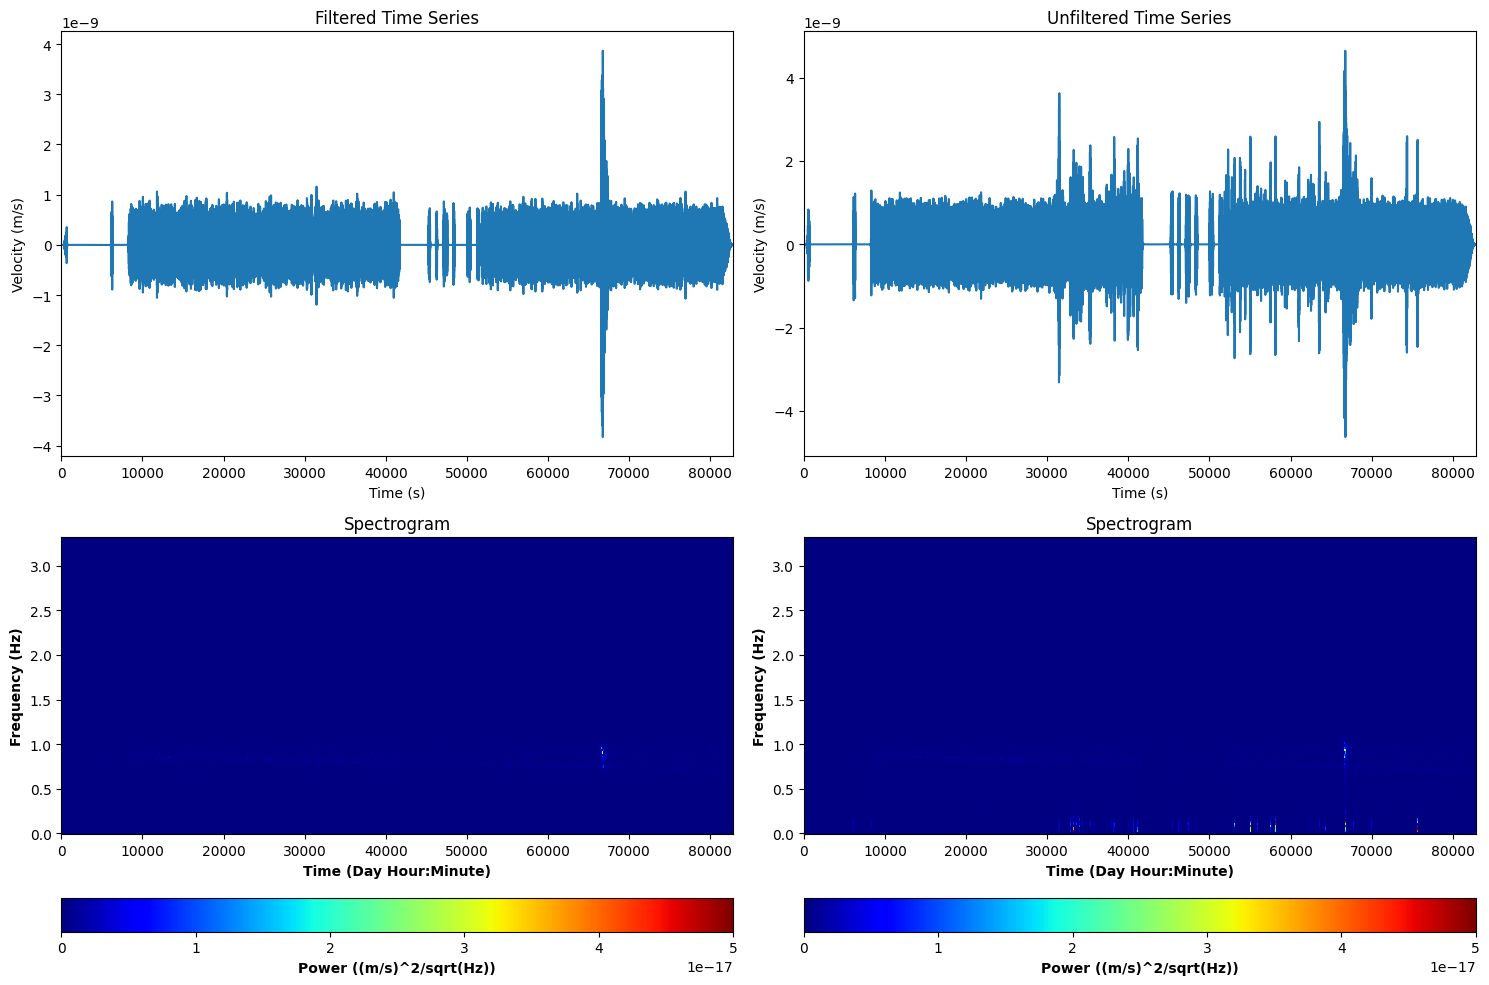

In [5]:
# Step 1: Load all CSV files
#mseed_files = sorted(glob.glob('./data/lunar/training/data/S12_GradeA/*.mseed'))
mseed_files = sorted(glob.glob('./data/lunar/test/data/S15_GradeA/*.mseed'))
# Step 2: Define function to load CSV file
def load_mseed(file_idx):
    st = read(mseed_files[file_idx])
    return st, mseed_files[file_idx]

current_file_idx = 0
st, filename = load_mseed(current_file_idx)

# This is how you get the data and the time, which is in seconds
tr = st.traces[0].copy()
tr_times = tr.times()
tr_data = tr.data

# Set the minimum frequency
minfreq = 0.7
maxfreq = 1.0

# Going to create a separate trace for the filter data
st_filt = st.copy()
st_filt.filter('bandpass',freqmin=minfreq,freqmax=maxfreq)
tr_filt = st_filt.traces[0].copy()
tr_times_filt = tr_filt.times()
tr_data_filt = tr_filt.data


# To better see the patterns, we will create a spectrogram using the scipy function
# It requires the sampling rate, which we can get from the miniseed header as shown a few cells above
from scipy import signal
from matplotlib import cm
f, t, sxx = signal.spectrogram(tr_data_filt, tr_filt.stats.sampling_rate)
fu, tu, sxxu = signal.spectrogram(tr_data, tr.stats.sampling_rate)

# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot filtered trace in the first column of the first row
axs[0, 0].plot(tr_times_filt, tr_data_filt)
axs[0, 0].set_xlim([min(tr_times_filt), max(tr_times_filt)])
axs[0, 0].set_ylabel('Velocity (m/s)')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_title('Filtered Time Series')

# Plot spectrogram in the first column of the second row
vals = axs[1, 0].pcolormesh(t, f, sxx, cmap=cm.jet, vmax=5e-17)
axs[1, 0].set_xlim([min(tr_times_filt), max(tr_times_filt)])
axs[1, 0].set_xlabel('Time (Day Hour:Minute)', fontweight='bold')
axs[1, 0].set_ylabel('Frequency (Hz)', fontweight='bold')
axs[1, 0].set_title('Spectrogram')
cbar = plt.colorbar(vals, ax=axs[1, 0], orientation='horizontal')
cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')

# Plot unfiltered trace in the second column of the first row
axs[0, 1].plot(tr_times, tr_data)
axs[0, 1].set_xlim([min(tr_times), max(tr_times)])
axs[0, 1].set_ylabel('Velocity (m/s)')
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_title('Unfiltered Time Series')

# Plot spectrogram in the second column of the second row
vals = axs[1, 1].pcolormesh(tu, fu, sxxu, cmap=cm.jet, vmax=5e-17)
axs[1, 1].set_xlim([min(tr_times), max(tr_times)])
axs[1, 1].set_xlabel('Time (Day Hour:Minute)', fontweight='bold')
axs[1, 1].set_ylabel('Frequency (Hz)', fontweight='bold')
axs[1, 1].set_title('Spectrogram')
cbar = plt.colorbar(vals, ax=axs[1, 1], orientation='horizontal')
cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

6.625
6.625
6.625
6.625
6.625
6.625
6.625
6.625
6.625


IndexError: list index out of range

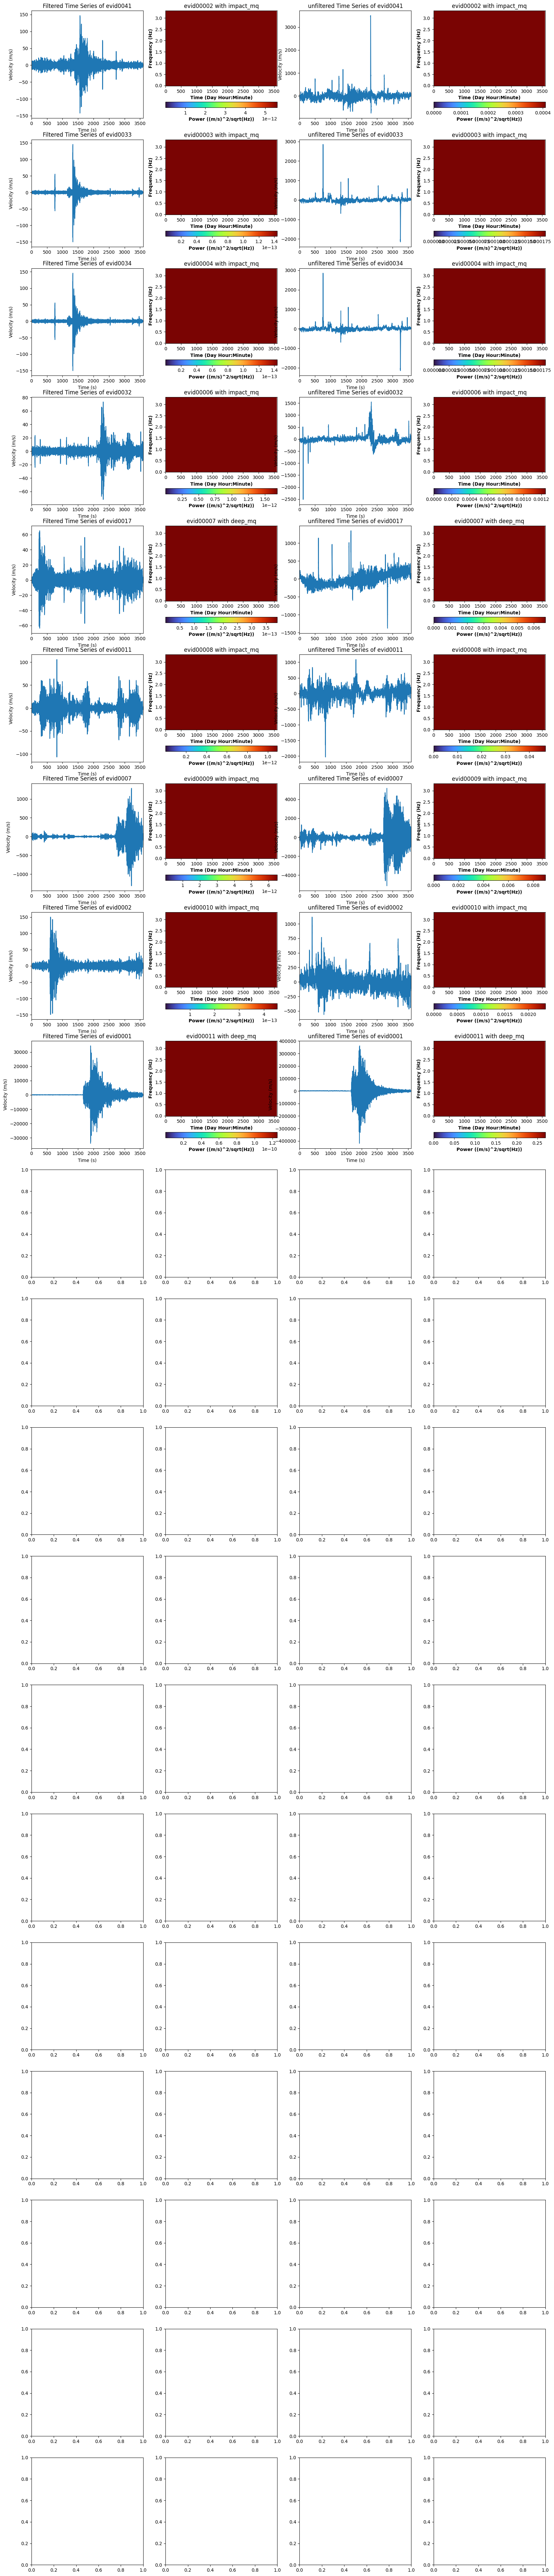

In [10]:
# Step 1: Load all CSV files
#mseed_files = sorted(glob.glob('./data/lunar/training/data/S12_GradeA/*.mseed'))
#mseed_files = sorted(glob.glob('./data/lunar/test/data/S15_GradeB/*.mseed'))
mseed_files = sorted(glob.glob('./data/mars/test/data/*.mseed'))
# Step 2: Define function to load CSV file
def load_mseed(file_idx):
    st = read(mseed_files[file_idx])
    return st, mseed_files[file_idx]
current_file_idx = 0


# Define the number of files to display
#num_files_to_display = len(mseed_files)
num_files_to_display = 20

# Create a vertical plot layout based on the number of files (each file gets 4 plots)
fig, axs = plt.subplots(num_files_to_display, 4, figsize=(20, 5 * num_files_to_display))

for i in range(num_files_to_display):
    # Load the MiniSEED file
    st, filename = load_mseed(current_file_idx + i)  # Incrementing file index


    # Extract the evid part from the filename
    evid = filename.split('_')[-1].split('.')[0]
    row = cat.iloc[i]
    filename_cat = row.filename
    filename_cat = filename_cat.split('_')[-1].split('.')[0]
    event_type = row.mq_type
    
    tr = st.traces[0].copy()
    tr.resample(6.625)
    tr_times = tr.times()
    tr_data = tr.data
    # Sampling frequency of our trace
    df = tr.stats.sampling_rate
    print(df)

    # Define the frequency range for the bandpass filter
    minfreq = 0.7
    maxfreq = 0.9

    # Apply the filter
    st_filt = st.copy()
    st_filt.filter('bandpass', freqmin=minfreq, freqmax=maxfreq)
    tr_filt = st_filt.traces[0].copy()
    tr_filt.resample(6.625)
    tr_times_filt = tr_filt.times()
    tr_data_filt = tr_filt.data
    # Normalize tr_data_filt between -1 and 1
    #tr_data_filt = 2 * (tr_data_filt - np.min(tr_data_filt)) / (np.max(tr_data_filt) - np.min(tr_data_filt)) - 1

    # Compute spectrograms
    f, t, sxx = signal.spectrogram(tr_data_filt, tr_filt.stats.sampling_rate)
    fu, tu, sxxu = signal.spectrogram(tr_data, tr.stats.sampling_rate)
    

    # Plot filtered trace in the first column
    axs[i, 0].plot(tr_times_filt, tr_data_filt)
    axs[i, 0].set_xlim([min(tr_times_filt), max(tr_times_filt)])
    axs[i, 0].set_ylabel('Velocity (m/s)')
    axs[i, 0].set_xlabel('Time (s)')
    axs[i, 0].set_title(f'Filtered Time Series of {evid}')

    # Plot spectrogram for filtered data in the second column
    vals = axs[i, 1].pcolormesh(t, f, sxx, cmap='turbo', vmax=1e-17)
    axs[i, 1].set_xlim([min(tr_times_filt), max(tr_times_filt)])
    axs[i, 1].set_xlabel('Time (Day Hour:Minute)', fontweight='bold')
    axs[i, 1].set_ylabel('Frequency (Hz)', fontweight='bold')
    axs[i, 1].set_title(f'{filename_cat} with {event_type}')
    cbar = plt.colorbar(vals, ax=axs[i, 1], orientation='horizontal')
    cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')

    # Plot unfiltered trace in the third column
    axs[i, 2].plot(tr_times, tr_data)
    axs[i, 2].set_xlim([min(tr_times), max(tr_times)])
    axs[i, 2].set_ylabel('Velocity (m/s)')
    axs[i, 2].set_xlabel('Time (s)')
    axs[i, 2].set_title(f'unfiltered Time Series of {evid}')

    # Plot spectrogram for unfiltered data in the fourth column
    vals = axs[i, 3].pcolormesh(tu, fu, sxxu, cmap='turbo', vmax=1e-17)
    axs[i, 3].set_xlim([min(tr_times), max(tr_times)])
    axs[i, 3].set_xlabel('Time (Day Hour:Minute)', fontweight='bold')
    axs[i, 3].set_ylabel('Frequency (Hz)', fontweight='bold')
    axs[i, 3].set_title(f'{filename_cat} with {event_type}')
    cbar = plt.colorbar(vals, ax=axs[i, 3], orientation='horizontal')
    cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

6.625
6.625
6.625
6.625
6.625
6.625
6.625
6.625
6.625
6.625


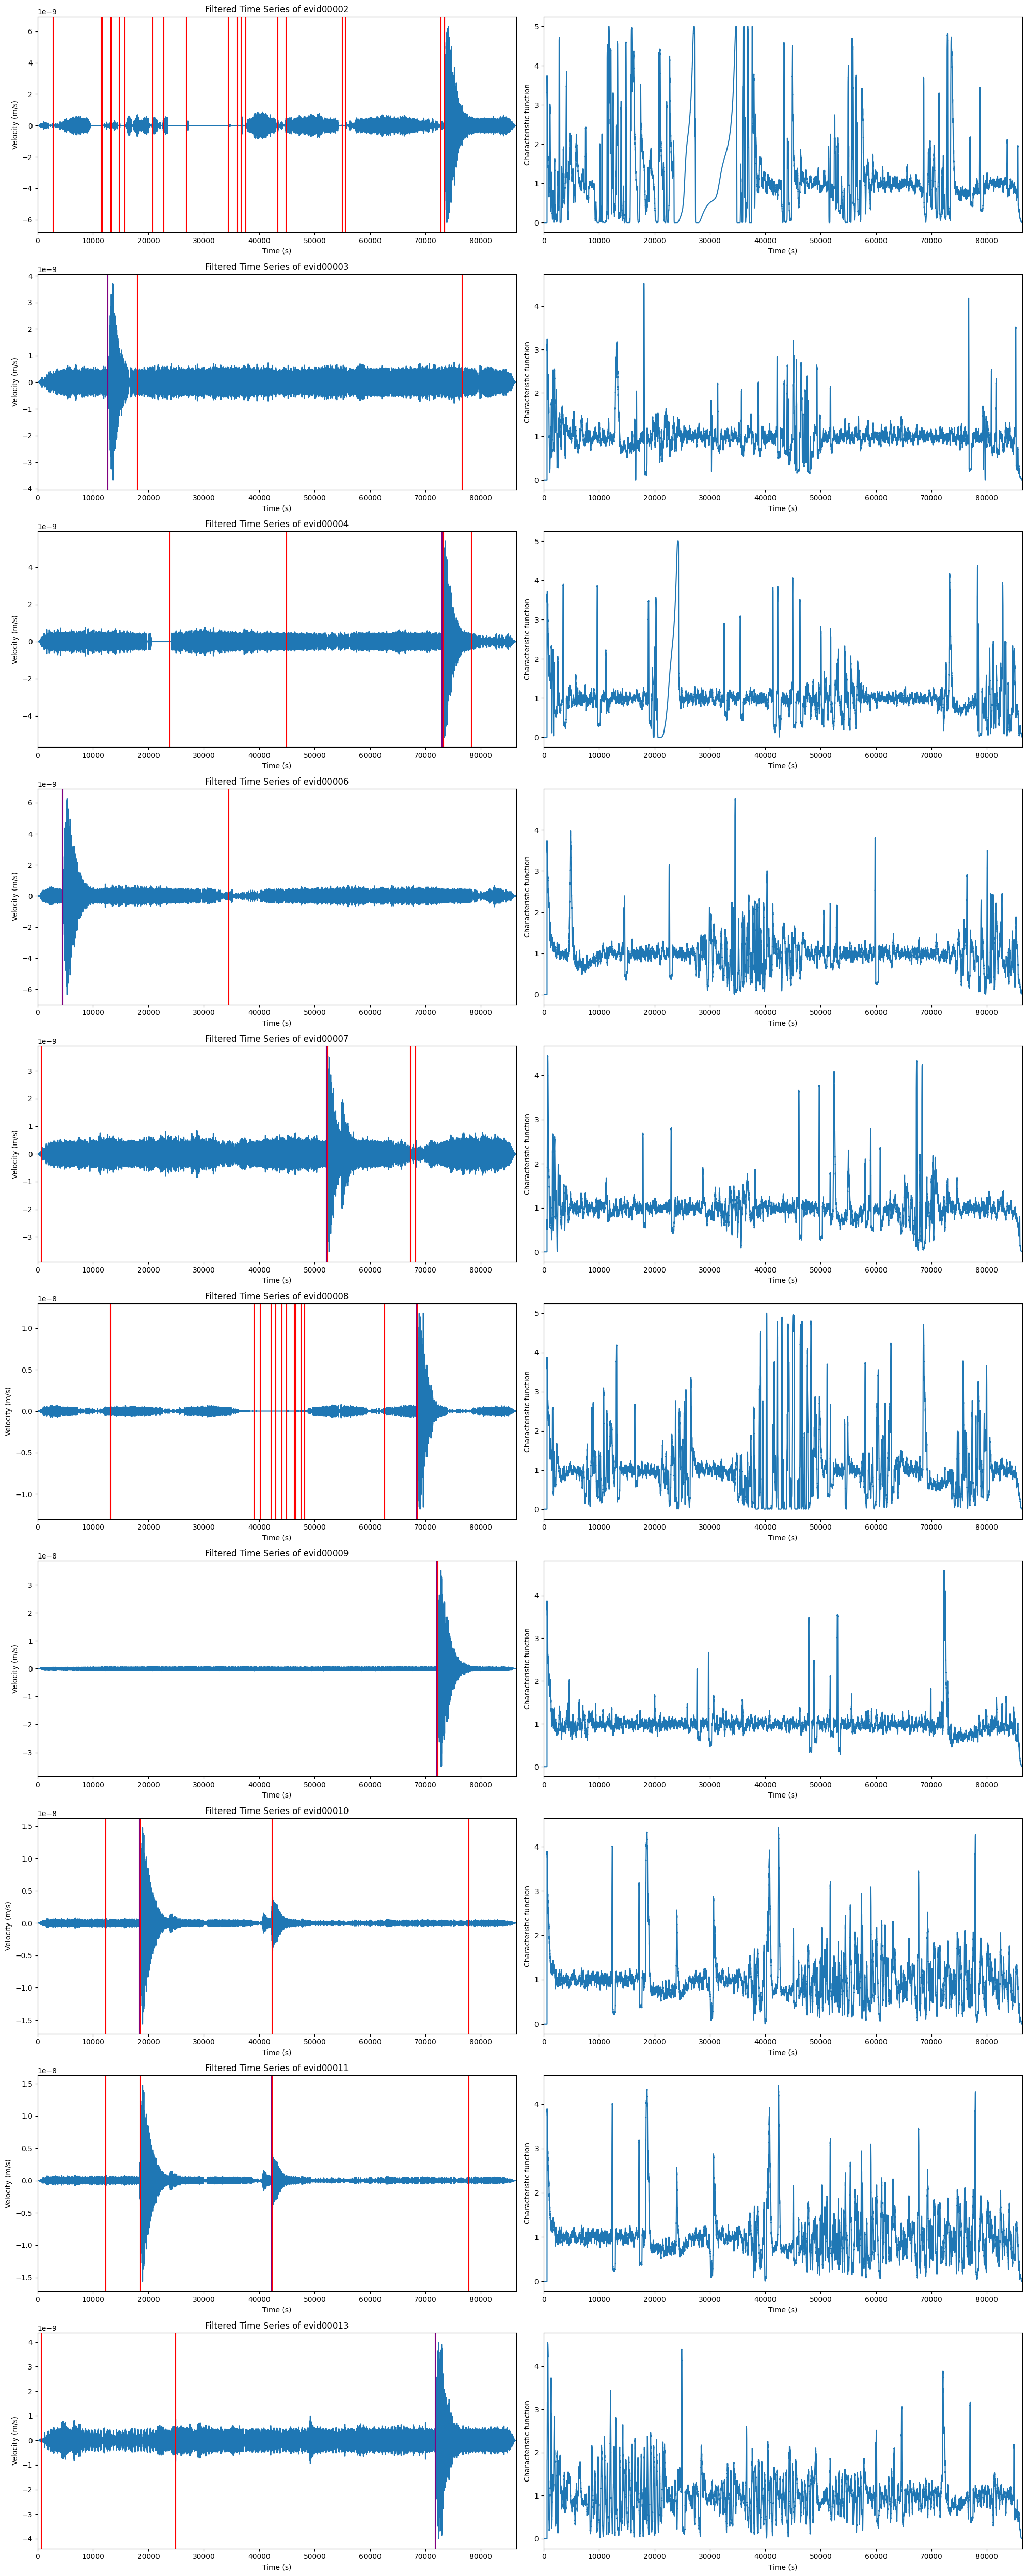

In [6]:
# Step 1: Load all CSV files
mseed_files = sorted(glob.glob('./data/lunar/training/data/S12_GradeA/*.mseed'))
#mseed_files = sorted(glob.glob('./data/lunar/test/data/S15_GradeA/*.mseed'))
# Step 2: Define function to load CSV file
def load_mseed(file_idx):
    st = read(mseed_files[file_idx])
    return st, mseed_files[file_idx]
current_file_idx = 0


# Define the number of files to display
#num_files_to_display = len(mseed_files)
num_files_to_display = 10

# Create a vertical plot layout based on the number of files (each file gets 4 plots)
fig, axs = plt.subplots(num_files_to_display, 2, figsize=(20, 5 * num_files_to_display))

for i in range(num_files_to_display):
    # Load the MiniSEED file
    st, filename = load_mseed(current_file_idx + i)  # Incrementing file index
    # Extract the evid part from the filename
    evid = filename.split('_')[-1].split('.')[0]
    row = cat.iloc[i]
    filename_cat = row.filename
    filename_cat = filename_cat.split('_')[-1].split('.')[0]
    event_type = row.mq_type
    arrival_time_rel = row['time_rel(sec)']
    
    tr = st.traces[0].copy()
    tr_times = tr.times()
    tr_data = tr.data

    # Define the frequency range for the bandpass filter
    minfreq = 0.7
    maxfreq = 1.0

    # ============================Apply the filter
    st_filt = st.copy()
    st_filt.filter('bandpass', freqmin=minfreq, freqmax=maxfreq)
    tr_filt = st_filt.traces[0].copy()
    tr_times_filt = tr_filt.times()
    tr_data_filt = tr_filt.data

    # ============================Compute spectrograms
    f, t, sxx = signal.spectrogram(tr_data_filt, tr_filt.stats.sampling_rate)
    fu, tu, sxxu = signal.spectrogram(tr_data, tr.stats.sampling_rate)



    #================================performing STA/LTA
    from obspy.signal.invsim import cosine_taper
    from obspy.signal.filter import highpass
    from obspy.signal.trigger import classic_sta_lta, plot_trigger, trigger_onset

    # Sampling frequency of our trace
    df = tr.stats.sampling_rate
    print(df)

    # How long should the short-term and long-term window be, in seconds?
    sta_len = 2*60
    lta_len = 10*60

    # Run Obspy's STA/LTA to obtain a characteristic function
    # This function basically calculates the ratio of amplitude between the short-term 
    # and long-term windows, moving consecutively in time across the data
    #cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))
    # Use absolute values of the signal to avoid cancellation of positive and negative amplitudes
    tr_data_abs = np.abs(tr_data)

    # Run Obspy's STA/LTA to obtain a characteristic function
    cft = classic_sta_lta(tr_data_abs, int(sta_len * df), int(lta_len * df))
    


    # ========================Play around with the on and off triggers, based on values in the characteristic function
    thr_on = 4
    thr_off = 1.5
    on_off = np.array(trigger_onset(cft, thr_on, thr_off))
    # The first column contains the indices where the trigger is turned "on". 
    # The second column contains the indices where the trigger is turned "off".



    # Plot filtered trace in the first column
    axs[i, 0].plot(tr_times, tr_data_filt)
    axs[i, 0].set_xlim([min(tr_times), max(tr_times)])
    axs[i, 0].set_ylabel('Velocity (m/s)')
    axs[i, 0].set_xlabel('Time (s)')
    axs[i, 0].set_title(f'Filtered Time Series of {evid}')
    arrival_line = axs[i, 0].axvline(x=arrival_time_rel, c='purple', label='Abs. Arrival')
    for j in np.arange(0,len(on_off)):
        triggers = on_off[j]
        axs[i, 0].axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
        #axs[i, 0].axvline(x = tr_times[triggers[1]], color='red', label='Trig. Off')


    # Plot characteristic function
    axs[i,1].plot(tr_times,cft)
    axs[i,1].set_xlim([min(tr_times),max(tr_times)])
    axs[i,1].set_xlabel('Time (s)')
    axs[i,1].set_ylabel('Characteristic function')

    # # Plot spectrogram for filtered data in the second column
    # vals = axs[i, 1].pcolormesh(t, f, sxx, cmap='turbo', vmax=1e-17)
    # axs[i, 1].set_xlim([min(tr_times_filt), max(tr_times_filt)])
    # axs[i, 1].set_xlabel('Time (Day Hour:Minute)', fontweight='bold')
    # axs[i, 1].set_ylabel('Frequency (Hz)', fontweight='bold')
    # axs[i, 1].set_title(f'{filename_cat} with {event_type}')
    # cbar = plt.colorbar(vals, ax=axs[i, 1], orientation='horizontal')
    # cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')
    # arrival_line = axs[i, 1].axvline(x=arrival_time_rel, c='purple', label='Abs. Arrival')
    # for j in np.arange(0,len(on_off)):
    #     triggers = on_off[j]
    #     axs[i, 1].axvline(x = tr_times_filt[triggers[0]], color='red', label='Trig. On')
    #     axs[i, 1].axvline(x = tr_times_filt[triggers[1]], color='red', label='Trig. Off')


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

6.625
6.625
6.625


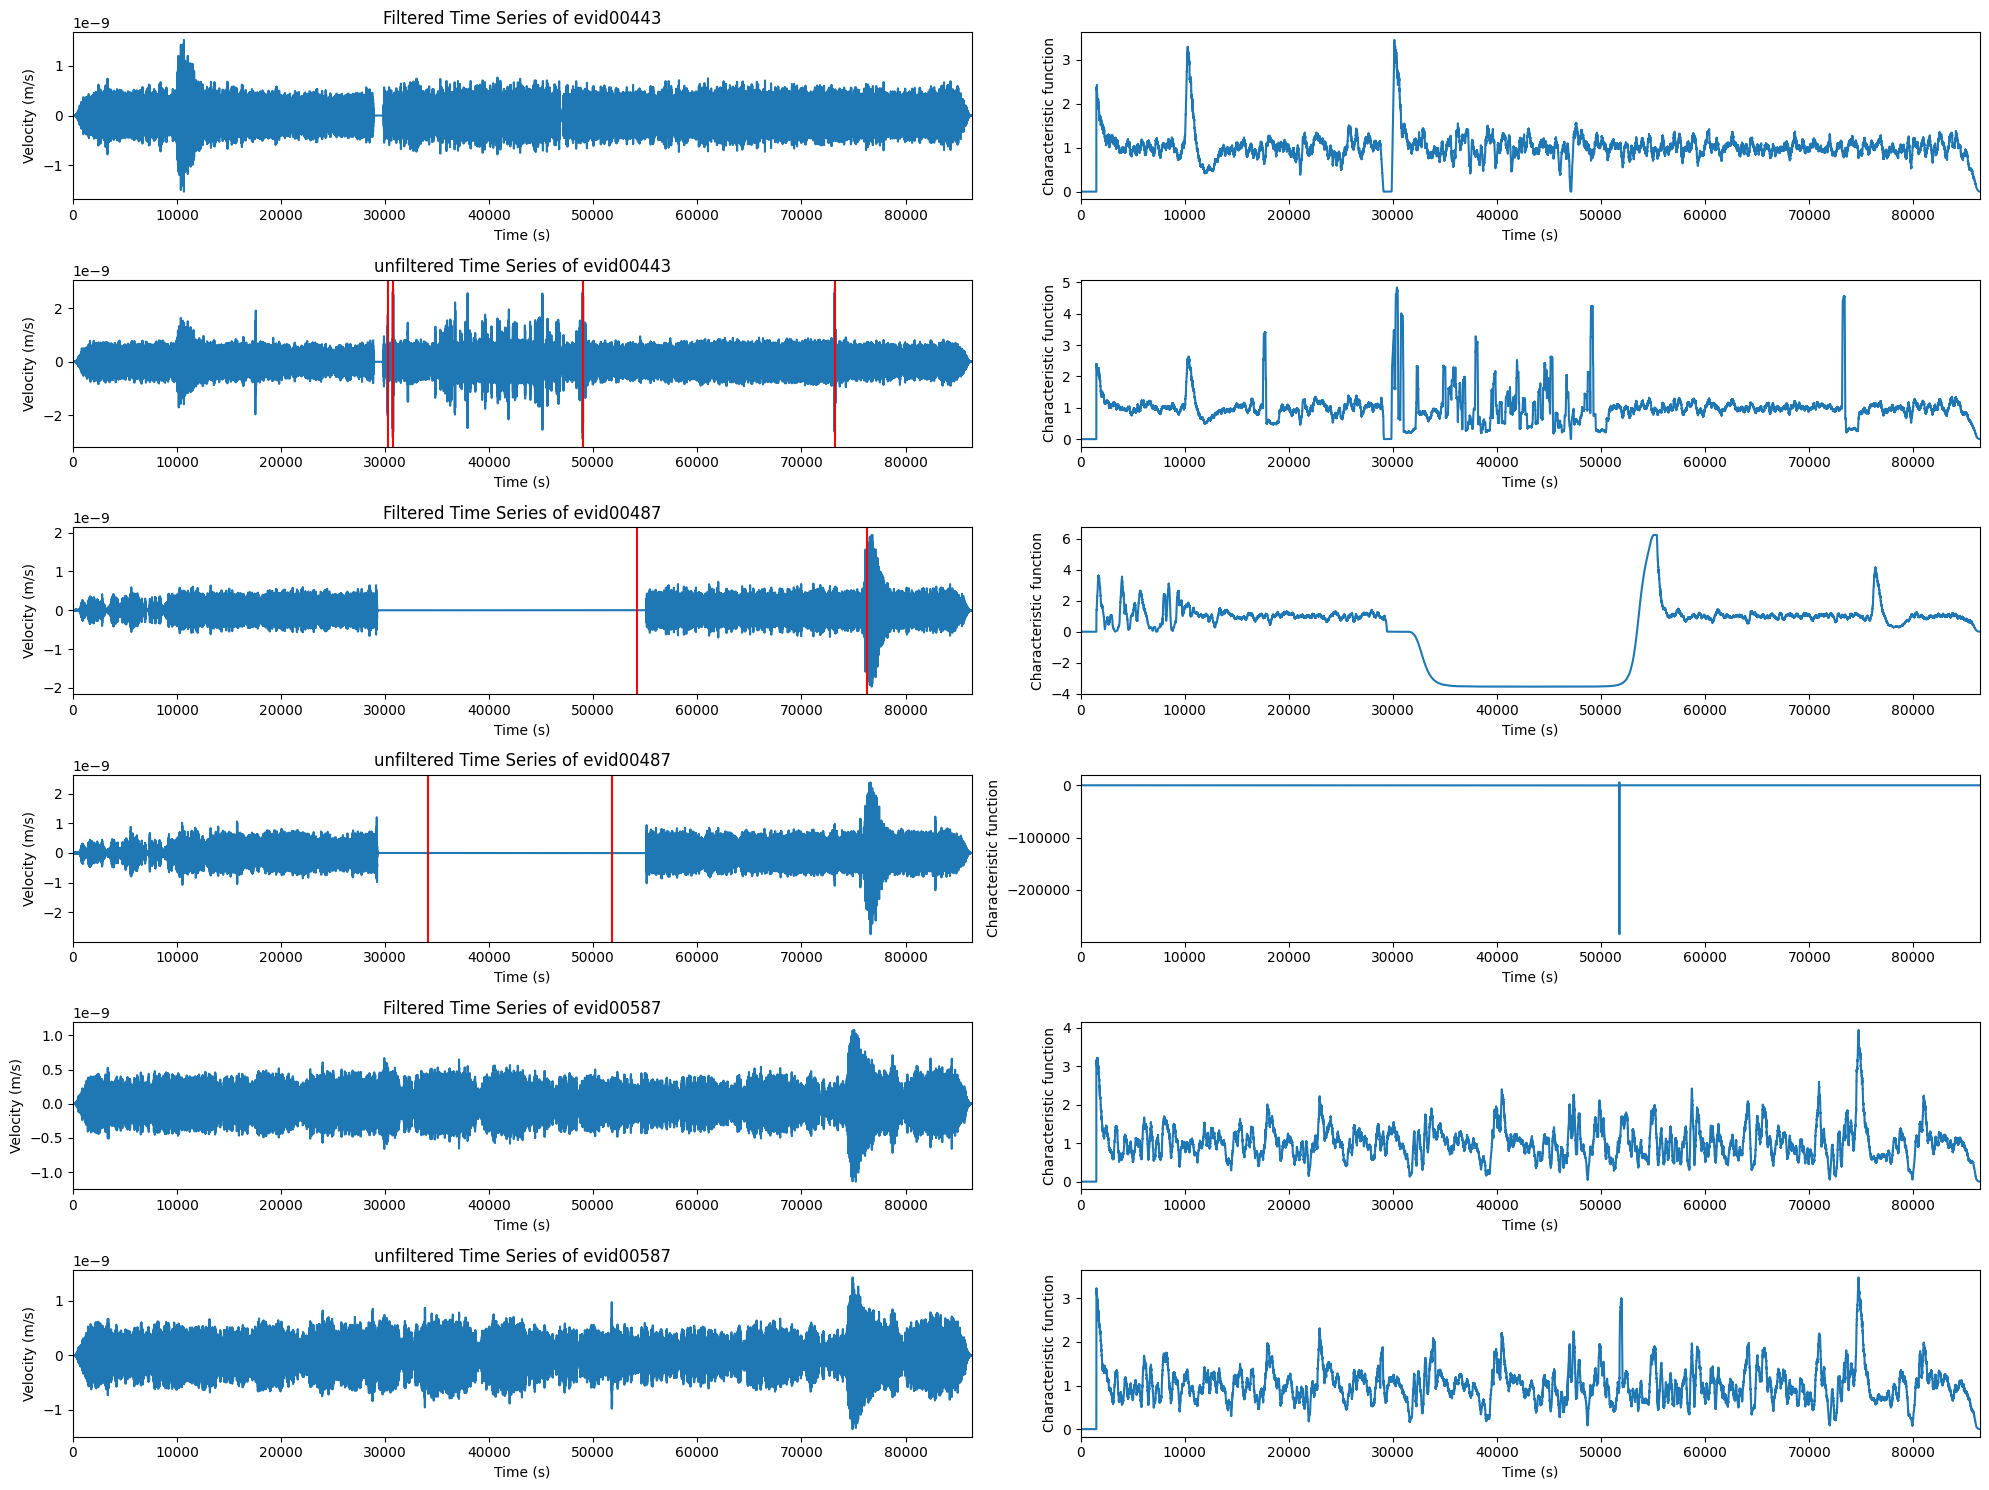

In [9]:
# Step 1: Load all CSV files
#mseed_files = sorted(glob.glob('./data/lunar/training/data/S12_GradeA/*.mseed'))
mseed_files = sorted(glob.glob('./data/lunar/test/data/S16_GradeB/*.mseed'))
#mseed_files = sorted(glob.glob('./data/mars/test/data/*.mseed'))
# Step 2: Define function to load CSV file
def load_mseed(file_idx):
    st = read(mseed_files[file_idx])
    return st, mseed_files[file_idx]
current_file_idx = 0


# Define the number of files to display
num_files_to_display = len(mseed_files)
#num_files_to_display = 3

# Create a vertical plot layout based on the number of files (each file gets 4 plots)
fig, axs = plt.subplots(num_files_to_display*2, 2, figsize=(20, 5 * num_files_to_display))

for i in range(num_files_to_display):
    # Load the MiniSEED file
    st, filename = load_mseed(current_file_idx + i)  # Incrementing file index
    # Extract the evid part from the filename
    evid = filename.split('_')[-1].split('.')[0]
    row = cat.iloc[i]
    filename_cat = row.filename
    filename_cat = filename_cat.split('_')[-1].split('.')[0]
    event_type = row.mq_type
    arrival_time_rel = row['time_rel(sec)']
    
    tr = st.traces[0].copy()
    tr_times = tr.times()
    tr_data = tr.data

    # Define the frequency range for the bandpass filter
    minfreq = 0.6
    maxfreq = 1

    # ============================Apply the filter
    st_filt = st.copy()
    st_filt.filter('bandpass', freqmin=minfreq, freqmax=maxfreq)
    tr_filt = st_filt.traces[0].copy()
    tr_times_filt = tr_filt.times()
    tr_data_filt = tr_filt.data

    # ============================Compute spectrograms
    f, t, sxx = signal.spectrogram(tr_data_filt, tr_filt.stats.sampling_rate)
    fu, tu, sxxu = signal.spectrogram(tr_data, tr.stats.sampling_rate)



    #================================performing STA/LTA
    from obspy.signal.invsim import cosine_taper
    from obspy.signal.filter import highpass
    from obspy.signal.trigger import classic_sta_lta, plot_trigger, trigger_onset

    # Sampling frequency of our trace
    df = tr.stats.sampling_rate
    print(df)

    # How long should the short-term and long-term window be, in seconds?
    sta_len = 4*60
    lta_len = 25*60
    # sta_len = 2*60
    # lta_len = 15*60

    # Run Obspy's STA/LTA to obtain a characteristic function
    # This function basically calculates the ratio of amplitude between the short-term 
    # and long-term windows, moving consecutively in time across the data
    #cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))
    # Use absolute values of the signal to avoid cancellation of positive and negative amplitudes
    tr_data_abs = np.abs(tr_data)
    tr_data_abs_filt = np.abs(tr_data_filt)

    # Run Obspy's STA/LTA to obtain a characteristic function
    cft = classic_sta_lta(tr_data_abs_filt, int(sta_len * df), int(lta_len * df))
    un_cft = classic_sta_lta(tr_data_abs, int(sta_len * df), int(lta_len * df))


    # ========================Play around with the on and off triggers, based on values in the characteristic function
    thr_on = 4
    thr_off = 1.5
    on_off = np.array(trigger_onset(cft, thr_on, thr_off))
    un_on_off = np.array(trigger_onset(un_cft, thr_on, thr_off))
    # The first column contains the indices where the trigger is turned "on". 
    # The second column contains the indices where the trigger is turned "off".


    # # Calculate the number of data points corresponding to the first 4.2%
    # num_points = int(len(tr_times) * 0.042)

    # # Slice the arrays to include only the first 4.2% of the data
    # tr_times = tr_times[:num_points]
    # tr_data_filt = tr_data_filt[:num_points]
    # tr_data = tr_data[:num_points]
    # cft = cft[:num_points]
    # un_cft = un_cft[:num_points]


    i = i*2
    # Plot filtered trace in the first column
    axs[i, 0].plot(tr_times, tr_data_filt)
    axs[i, 0].set_xlim([min(tr_times), max(tr_times)])
    axs[i, 0].set_ylabel('Velocity (m/s)')
    axs[i, 0].set_xlabel('Time (s)')
    axs[i, 0].set_title(f'Filtered Time Series of {evid}')
    #arrival_line = axs[i, 0].axvline(x=arrival_time_rel, c='purple', label='Abs. Arrival')
    for j in np.arange(0,len(on_off)):
        triggers = on_off[j]
        axs[i, 0].axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
        #axs[i, 0].axvline(x = tr_times[triggers[0]]+(40*60), color='blue', label='Trig. On')


    
    # Plot characteristic function
    axs[i,1].plot(tr_times,cft)
    axs[i,1].set_xlim([min(tr_times),max(tr_times)])
    axs[i,1].set_xlabel('Time (s)')
    axs[i,1].set_ylabel('Characteristic function')



    i = i+1
    # Plot unfiltered trace in the first column
    axs[i, 0].plot(tr_times, tr_data)
    axs[i, 0].set_xlim([min(tr_times), max(tr_times)])
    axs[i, 0].set_ylabel('Velocity (m/s)')
    axs[i, 0].set_xlabel('Time (s)')
    axs[i, 0].set_title(f'unfiltered Time Series of {evid}')
    #arrival_line = axs[i, 0].axvline(x=arrival_time_rel, c='purple', label='Abs. Arrival')
    for j in np.arange(0,len(un_on_off)):
        triggers = un_on_off[j]
        axs[i, 0].axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')


    # Plot characteristic function
    axs[i,1].plot(tr_times,un_cft)
    axs[i,1].set_xlim([min(tr_times),max(tr_times)])
    axs[i,1].set_xlabel('Time (s)')
    axs[i,1].set_ylabel('Characteristic function')




# Adjust layout for better spacing
plt.tight_layout()
plt.show()